#**Youtube Video Analysis**

Related Course: [The Full Stack Data Analyst BootCamp®](https://www.datamentor.ai)


###**ACTIVITIES**
##Initial Data Cleaning

1) Using json file to add the category column to the data replacing the category Id column

2) Check the data types of all the variable if they are appropriate for analysis

3) Converting the two columns publishedAt and trending_date to datetime

4) Check and take care of missing values. If column like "description" have missing values we can replace it by "No Description Provided"


## Framing Questions for Analysis
1.  Group by Channel Title and find top channels with Views, Likes, Dislikes and Comments

2.  Group by Channel Category and find top channels with Views, Likes, Dislikes and Comments and bottom channels as well 

3. Which Category Videos are being watched and are in trending for most of the times? (Categories such as: Movies, Education,Videoblogging, etc)

4. What's the average time taken for a video to be in trending categorically?

5. What's the average no.of views required to enter into trending?

6. Which Youtube channel in India has more videos in Trending?

7. Understanding the significance of Likes,Dislikes and Comments.

###FURTHER ANALYSIS :: Student Assignment


1) Which category of videos have comments disabled ? 

2) Which category of videos have ratings disabled ? 

3) Most watched video in India overall | Year wise | Category wise 

4) Yearwise number of Videos published which were trending 

5) Distributions of Numerical Columns 

6) View the correlations between the numerical variables 

7) Plot the lmplots and regplots with numerical and categorical variables combinations and their relationships 

In [62]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from scipy import stats
from sklearn import preprocessing
from sklearn.preprocessing import scale
import plotly.express as px
warnings.filterwarnings('ignore')
sns.set(style="whitegrid")

In [63]:
categories = pd.read_json("IN_category_id.json")

In [64]:
categories

,kind,etag,items
0,youtube#videoCategoryListResponse,kBCr3I9kLHHU79W4Ip5196LDptI,"{'kind': 'youtube#videoCategory', 'etag': 'IfW..."
1,youtube#videoCategoryListResponse,kBCr3I9kLHHU79W4Ip5196LDptI,"{'kind': 'youtube#videoCategory', 'etag': '5XG..."
2,youtube#videoCategoryListResponse,kBCr3I9kLHHU79W4Ip5196LDptI,"{'kind': 'youtube#videoCategory', 'etag': 'HCj..."
3,youtube#videoCategoryListResponse,kBCr3I9kLHHU79W4Ip5196LDptI,"{'kind': 'youtube#videoCategory', 'etag': 'ra8..."
4,youtube#videoCategoryListResponse,kBCr3I9kLHHU79W4Ip5196LDptI,"{'kind': 'youtube#videoCategory', 'etag': '7mq..."
5,youtube#videoCategoryListResponse,kBCr3I9kLHHU79W4Ip5196LDptI,"{'kind': 'youtube#videoCategory', 'etag': '0Z6..."
6,youtube#videoCategoryListResponse,kBCr3I9kLHHU79W4Ip5196LDptI,"{'kind': 'youtube#videoCategory', 'etag': 'K_-..."
7,youtube#videoCategoryListResponse,kBCr3I9kLHHU79W4Ip5196LDptI,"{'kind': 'youtube#videoCategory', 'etag': 'I3I..."
8,youtube#videoCategoryListResponse,kBCr3I9kLHHU79W4Ip5196LDptI,"{'kind': 'youtube#videoCategory', 'etag': 'D1W..."
9,youtube#videoCategoryListResponse,kBCr3I9kLHHU79W4Ip5196LDptI,"{'kind': 'youtube#videoCategory', 'etag': 'QME..."


In [65]:
categories['items'][2]


{'kind': 'youtube#videoCategory',
 'etag': 'HCjFMARbBeWjpm6PDfReCOMOZGA',
 'id': '10',
 'snippet': {'title': 'Music',
  'assignable': True,
  'channelId': 'UCBR8-60-B28hp2BmDPdntcQ'}}

In [66]:
#Creating dictionary for json file provided for category and category id
category_dict = {}
for i in categories['items']:
    category_dict[i['id']] = i['snippet']['title']

In [67]:
category_dict

{'1': 'Film & Animation',
 '2': 'Autos & Vehicles',
 '10': 'Music',
 '15': 'Pets & Animals',
 '17': 'Sports',
 '18': 'Short Movies',
 '19': 'Travel & Events',
 '20': 'Gaming',
 '21': 'Videoblogging',
 '22': 'People & Blogs',
 '23': 'Comedy',
 '24': 'Entertainment',
 '25': 'News & Politics',
 '26': 'Howto & Style',
 '27': 'Education',
 '28': 'Science & Technology',
 '30': 'Movies',
 '31': 'Anime/Animation',
 '32': 'Action/Adventure',
 '33': 'Classics',
 '34': 'Comedy',
 '35': 'Documentary',
 '36': 'Drama',
 '37': 'Family',
 '38': 'Foreign',
 '39': 'Horror',
 '40': 'Sci-Fi/Fantasy',
 '41': 'Thriller',
 '42': 'Shorts',
 '43': 'Shows',
 '44': 'Trailers'}

In [68]:
#Reading the actual data 
df = pd.read_csv("IN_youtube_trending_data.csv")
print(type(df))

<class 'pandas.core.frame.DataFrame'>


In [69]:
df.head()

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description
0,Iot0eF6EoNA,Sadak 2 | Official Trailer | Sanjay | Pooja | ...,2020-08-12T04:31:41Z,UCGqvJPRcv7aVFun-eTsatcA,FoxStarHindi,24,2020-08-12T00:00:00Z,sadak|sadak 2|mahesh bhatt|vishesh films|pooja...,9885899,224925,3979409,350210,https://i.ytimg.com/vi/Iot0eF6EoNA/default.jpg,False,False,Three Streams. Three Stories. One Journey. Sta...
1,x-KbnJ9fvJc,Kya Baat Aa : Karan Aujla (Official Video) Tan...,2020-08-11T09:00:11Z,UCm9SZAl03Rev9sFwloCdz1g,Rehaan Records,10,2020-08-12T00:00:00Z,[None],11308046,655450,33242,405146,https://i.ytimg.com/vi/x-KbnJ9fvJc/default.jpg,False,False,Singer/Lyrics: Karan Aujla Feat Tania Music/ D...
2,KX06ksuS6Xo,Diljit Dosanjh: CLASH (Official) Music Video |...,2020-08-11T07:30:02Z,UCZRdNleCgW-BGUJf-bbjzQg,Diljit Dosanjh,10,2020-08-12T00:00:00Z,clash diljit dosanjh|diljit dosanjh|diljit dos...,9140911,296533,6179,30058,https://i.ytimg.com/vi/KX06ksuS6Xo/default.jpg,False,False,CLASH official music video performed by DILJIT...
3,UsMRgnTcchY,Dil Ko Maine Di Kasam Video | Amaal M Ft.Ariji...,2020-08-10T05:30:49Z,UCq-Fj5jknLsUf-MWSy4_brA,T-Series,10,2020-08-12T00:00:00Z,hindi songs|2020 hindi songs|2020 new songs|t-...,23564512,743931,84162,136942,https://i.ytimg.com/vi/UsMRgnTcchY/default.jpg,False,False,Gulshan Kumar and T-Series presents Bhushan Ku...
4,WNSEXJJhKTU,"Baarish (Official Video) Payal Dev,Stebin Ben ...",2020-08-11T05:30:13Z,UCye6Oz0mg46S362LwARGVcA,VYRLOriginals,10,2020-08-12T00:00:00Z,VYRL Original|Mohsin Khan|Shivangi Joshi|Payal...,6783649,268817,8798,22984,https://i.ytimg.com/vi/WNSEXJJhKTU/default.jpg,False,False,VYRL Originals brings to you ‘Baarish’ - the b...


In [70]:
df.describe()

,categoryId,view_count,likes,dislikes,comment_count
count,152593.000000,1.525930e+05,1.525930e+05,1.525930e+05,1.525930e+05
mean,20.928005,3.148897e+06,1.695163e+05,3.842192e+03,9.988589e+03
std,5.958950,7.553347e+06,4.454034e+05,9.236131e+04,8.708685e+04
min,1.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,20.000000,4.568570e+05,1.737800e+04,0.000000e+00,4.080000e+02
50%,24.000000,1.100973e+06,5.066700e+04,3.830000e+02,1.330000e+03
75%,24.000000,2.801690e+06,1.464980e+05,1.931000e+03,4.613000e+03
max,29.000000,2.644074e+08,1.611524e+07,1.234147e+07,6.738565e+06


In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152593 entries, 0 to 152592
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   video_id           152593 non-null  object
 1   title              152593 non-null  object
 2   publishedAt        152593 non-null  object
 3   channelId          152593 non-null  object
 4   channelTitle       152592 non-null  object
 5   categoryId         152593 non-null  int64 
 6   trending_date      152593 non-null  object
 7   tags               152593 non-null  object
 8   view_count         152593 non-null  int64 
 9   likes              152593 non-null  int64 
 10  dislikes           152593 non-null  int64 
 11  comment_count      152593 non-null  int64 
 12  thumbnail_link     152593 non-null  object
 13  comments_disabled  152593 non-null  bool  
 14  ratings_disabled   152593 non-null  bool  
 15  description        135820 non-null  object
dtypes: bool(2), int64(5)

<br>

Let's check the no.of records for a random video: Iot0eF6EoNA

In [72]:
df.head()



,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description
0,Iot0eF6EoNA,Sadak 2 | Official Trailer | Sanjay | Pooja | ...,2020-08-12T04:31:41Z,UCGqvJPRcv7aVFun-eTsatcA,FoxStarHindi,24,2020-08-12T00:00:00Z,sadak|sadak 2|mahesh bhatt|vishesh films|pooja...,9885899,224925,3979409,350210,https://i.ytimg.com/vi/Iot0eF6EoNA/default.jpg,False,False,Three Streams. Three Stories. One Journey. Sta...
1,x-KbnJ9fvJc,Kya Baat Aa : Karan Aujla (Official Video) Tan...,2020-08-11T09:00:11Z,UCm9SZAl03Rev9sFwloCdz1g,Rehaan Records,10,2020-08-12T00:00:00Z,[None],11308046,655450,33242,405146,https://i.ytimg.com/vi/x-KbnJ9fvJc/default.jpg,False,False,Singer/Lyrics: Karan Aujla Feat Tania Music/ D...
2,KX06ksuS6Xo,Diljit Dosanjh: CLASH (Official) Music Video |...,2020-08-11T07:30:02Z,UCZRdNleCgW-BGUJf-bbjzQg,Diljit Dosanjh,10,2020-08-12T00:00:00Z,clash diljit dosanjh|diljit dosanjh|diljit dos...,9140911,296533,6179,30058,https://i.ytimg.com/vi/KX06ksuS6Xo/default.jpg,False,False,CLASH official music video performed by DILJIT...
3,UsMRgnTcchY,Dil Ko Maine Di Kasam Video | Amaal M Ft.Ariji...,2020-08-10T05:30:49Z,UCq-Fj5jknLsUf-MWSy4_brA,T-Series,10,2020-08-12T00:00:00Z,hindi songs|2020 hindi songs|2020 new songs|t-...,23564512,743931,84162,136942,https://i.ytimg.com/vi/UsMRgnTcchY/default.jpg,False,False,Gulshan Kumar and T-Series presents Bhushan Ku...
4,WNSEXJJhKTU,"Baarish (Official Video) Payal Dev,Stebin Ben ...",2020-08-11T05:30:13Z,UCye6Oz0mg46S362LwARGVcA,VYRLOriginals,10,2020-08-12T00:00:00Z,VYRL Original|Mohsin Khan|Shivangi Joshi|Payal...,6783649,268817,8798,22984,https://i.ytimg.com/vi/WNSEXJJhKTU/default.jpg,False,False,VYRL Originals brings to you ‘Baarish’ - the b...


In [73]:
df[df.video_id=="Iot0eF6EoNA"]

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description
0,Iot0eF6EoNA,Sadak 2 | Official Trailer | Sanjay | Pooja | ...,2020-08-12T04:31:41Z,UCGqvJPRcv7aVFun-eTsatcA,FoxStarHindi,24,2020-08-12T00:00:00Z,sadak|sadak 2|mahesh bhatt|vishesh films|pooja...,9885899,224925,3979409,350210,https://i.ytimg.com/vi/Iot0eF6EoNA/default.jpg,False,False,Three Streams. Three Stories. One Journey. Sta...
171,Iot0eF6EoNA,Sadak 2 | Official Trailer | Sanjay | Pooja | ...,2020-08-12T04:31:41Z,UCGqvJPRcv7aVFun-eTsatcA,FoxStarHindi,24,2020-08-13T00:00:00Z,sadak|sadak 2|mahesh bhatt|vishesh films|pooja...,28165455,412594,7576610,659733,https://i.ytimg.com/vi/Iot0eF6EoNA/default.jpg,False,False,Three Streams. Three Stories. One Journey. Sta...
348,Iot0eF6EoNA,Sadak 2 | Official Trailer | Sanjay | Pooja | ...,2020-08-12T04:31:41Z,UCGqvJPRcv7aVFun-eTsatcA,FoxStarHindi,24,2020-08-14T00:00:00Z,sadak|sadak 2|mahesh bhatt|vishesh films|pooja...,39577543,509684,9260973,818229,https://i.ytimg.com/vi/Iot0eF6EoNA/default.jpg,False,False,Three Streams. Three Stories. One Journey. Sta...
523,Iot0eF6EoNA,Sadak 2 | Official Trailer | Sanjay | Pooja | ...,2020-08-12T04:31:41Z,UCGqvJPRcv7aVFun-eTsatcA,FoxStarHindi,24,2020-08-15T00:00:00Z,sadak|sadak 2|mahesh bhatt|vishesh films|pooja...,48458719,569806,10479328,926675,https://i.ytimg.com/vi/Iot0eF6EoNA/default.jpg,False,False,Three Streams. Three Stories. One Journey. Sta...
697,Iot0eF6EoNA,Sadak 2 | Official Trailer | Sanjay | Pooja | ...,2020-08-12T04:31:41Z,UCGqvJPRcv7aVFun-eTsatcA,FoxStarHindi,24,2020-08-16T00:00:00Z,sadak|sadak 2|mahesh bhatt|vishesh films|pooja...,53865934,605119,11213118,981278,https://i.ytimg.com/vi/Iot0eF6EoNA/default.jpg,False,False,Three Streams. Three Stories. One Journey. Sta...
894,Iot0eF6EoNA,Sadak 2 | Official Trailer | Sanjay | Pooja | ...,2020-08-12T04:31:41Z,UCGqvJPRcv7aVFun-eTsatcA,FoxStarHindi,24,2020-08-17T00:00:00Z,sadak|sadak 2|mahesh bhatt|vishesh films|pooja...,57978838,629440,11318674,1015427,https://i.ytimg.com/vi/Iot0eF6EoNA/default.jpg,False,False,Three Streams. Three Stories. One Journey. Sta...
1099,Iot0eF6EoNA,Sadak 2 | Official Trailer | Sanjay | Pooja | ...,2020-08-12T04:31:41Z,UCGqvJPRcv7aVFun-eTsatcA,FoxStarHindi,24,2020-08-18T00:00:00Z,sadak|sadak 2|mahesh bhatt|vishesh films|pooja...,60684140,645367,11610617,1033525,https://i.ytimg.com/vi/Iot0eF6EoNA/default.jpg,False,False,Three Streams. Three Stories. One Journey. Sta...
1313,Iot0eF6EoNA,Sadak 2 | Official Trailer | Sanjay | Pooja | ...,2020-08-12T04:31:41Z,UCGqvJPRcv7aVFun-eTsatcA,FoxStarHindi,24,2020-08-19T00:00:00Z,sadak|sadak 2|mahesh bhatt|vishesh films|pooja...,62560202,657374,11828671,1043781,https://i.ytimg.com/vi/Iot0eF6EoNA/default.jpg,False,False,Three Streams. Three Stories. One Journey. Sta...
1548,Iot0eF6EoNA,Sadak 2 | Official Trailer | Sanjay | Pooja | ...,2020-08-12T04:31:41Z,UCGqvJPRcv7aVFun-eTsatcA,FoxStarHindi,24,2020-08-20T00:00:00Z,sadak|sadak 2|mahesh bhatt|vishesh films|pooja...,64126227,667503,12066691,1057203,https://i.ytimg.com/vi/Iot0eF6EoNA/default.jpg,False,False,Three Streams. Three Stories. One Journey. Sta...
1809,Iot0eF6EoNA,Sadak 2 | Official Trailer | Sanjay | Pooja | ...,2020-08-12T04:31:41Z,UCGqvJPRcv7aVFun-eTsatcA,FoxStarHindi,24,2020-08-21T00:00:00Z,sadak|sadak 2|mahesh bhatt|vishesh films|pooja...,65454611,675091,12237370,1070532,https://i.ytimg.com/vi/Iot0eF6EoNA/default.jpg,False,False,Three Streams. Three Stories. One Journey. Sta...


Details inferred:

1. Same video can be there multiple times in dataset as the video can stay in trending for many consecutive days.
2. View Count,Likes and Dislikes Change as the time prolongs. So we shouldn't do group by on a Video_Id and add all the view_Counts,Likes,Dislikes as those will be repeated.

In [74]:
df.video_id.nunique()

46294

Though there are 152593: entries, no.of unique videos are: 46294

In [75]:
df.channelTitle.nunique()

4009

In [76]:
df.drop(["channelId","thumbnail_link"], inplace=True, axis=1)

<br>


For further Analysis, Let's gather enough details

df_maxViews stores the last occurance of VideoID. 

Intuition: Gathering final views,likes,comments before relegating from Trending data.

In [77]:
df_maxViews = df.sort_values('view_count', ascending=False).drop_duplicates(['video_id'])
df_maxViews.sample(5)

,video_id,title,publishedAt,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,comments_disabled,ratings_disabled,description
25036,txwvWlgJEzs,Sarada Sattipandu & Adhurs Anand Performance |...,2020-12-18T19:37:43Z,ETV Jabardasth,23,2020-12-24T00:00:00Z,jabardasth|etv jabardasth|jabardasth telugu|ja...,4154761,64338,3534,1453,False,False,#Jabardasth #ExtraJabardasth #TeluguShow #ETVW...
30823,lL3MWrOQsB0,Molkki | मोलक्की | Episode 50 | Coming Up Next,2021-01-23T11:31:06Z,Colors TV,24,2021-01-25T00:00:00Z,colors tv serials all|colors tv promo|colors t...,1409932,19186,575,227,False,False,#ColorsTV #MolkkiTo subscribe this channel go ...
118380,j1i5GlZF-Lg,Gaalipata 2 | Exam Song Teaser | Ganesh | Anan...,2022-04-18T11:40:37Z,Anand Audio,24,2022-04-21T00:00:00Z,gaalipata 2|gaalipata 2 first song teaser|gaal...,579371,37433,0,792,False,False,Presenting 4K Exam Song Teaser From the Movie ...
119792,rSjQBM1xlmA,Amit Saini Rohtakiya : Zindabaad Daaru | KP Ku...,2022-04-25T03:30:13Z,Kala Niketan,10,2022-04-28T00:00:00Z,Daaru|Zindabaad Daaru|Zindabaad Daaru Song|Daa...,708376,29203,0,7112,False,False,Amit Saini Rohtakiya : Zindabaad Daaru | KP Ku...
152343,RYHdiMmp8as,TSP's Bade Chote Jasoos | E02 - KBC Se Compute...,2022-10-04T06:30:36Z,The Screen Patti,24,2022-10-09T00:00:00Z,tsp|the screen patti|tsp bc jasoos|bc jasoos|t...,1462741,76628,0,2156,False,False,Iss baar BC Jasoos ke paas aaya hai computer j...


<br>

df_minViews stores the data of a video entering into trending videos for the first time

In [78]:
df_minViews = df.sort_values('view_count', ascending=True).drop_duplicates(['video_id'])
df_minViews.sample(5)

,video_id,title,publishedAt,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,comments_disabled,ratings_disabled,description
73123,Sdh3RNeKyPc,Rowdy Babyum Appaavi Daddyum Part 02 || Chutt...,2021-09-02T12:30:11Z,Rowdy Baby,24,2021-09-03T00:00:00Z,aazhiya|aazhiya videos|aazhiya comedy video|ch...,295163,9466,722,860,False,False,#aazhiya #rowdybaby #tamadamediaCast :\rAaziya...
49257,IHtsVZgrd2A,Travelling With Faiz Baloch - Friendship Goals...,2021-05-07T08:30:02Z,Mr. Faisu,24,2021-05-08T00:00:00Z,mr faisu dubai vlog|mr faisu|faisu|team 07|fai...,193783,39042,4478,4242,False,False,Register using my link https://binomoindia.in/...
74308,SL9aJcqrtnw,DON’T LOOK UP | Official Teaser Trailer | Netflix,2021-09-08T14:00:01Z,Netflix,24,2021-09-09T00:00:00Z,adam mckay|ariana grande|cate blanchett|comedy...,4575872,128792,2411,7360,False,False,The stars get struck. DON’T LOOK UP tells the ...
92911,U0nKD50gKzw,Jahangir Di Haveli (Full Video) Gulab Sidhu | ...,2021-12-11T04:30:08Z,5911 Records,10,2021-12-13T00:00:00Z,[None],866264,63029,1881,2881,False,False,5911 Records PresentsSinger : Gulab SidhuMusic...
70900,K75kJ09QkxI,"Day 2- Football, Cricket and lots of fun - Sup...",2021-08-21T14:01:45Z,Chennai Super Kings,2,2021-08-22T00:00:00Z,[None],202998,21816,112,823,False,False,Highlights from day two of training at the Kin...


<br>

Let's have the Total count of a video for it being in Trending

Let's append the categories to all dataframes we used till now

In [79]:
#i will use it in the cell below
categories['items'][1]['snippet']['title']

'Autos & Vehicles'

In [80]:
def fetch_video_category(value):
    return categories['items'][value]['snippet']['title']

#add the categories to the various dataframes:
df_maxViews["Video_Category"]=df_maxViews.categoryId.apply(fetch_video_category)
df_minViews["Video_Category"]=df_minViews.categoryId.apply(fetch_video_category)
df["Video_Category"]=df.categoryId.apply(fetch_video_category)

df.sample(5)

,video_id,title,publishedAt,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,comments_disabled,ratings_disabled,description,Video_Category
17860,QKcs8ExFeIA,I Tested Viral DIWALI Candle Hacks to see if t...,2020-11-12T02:30:11Z,Pragati Verma,24,2020-11-14T00:00:00Z,pragati Verma|prahati Verma|new|challenge|diwa...,534128,60326,1399,6880,False,False,"Subscriber Count: 8,03,000🧡Goal for the year:1...",Foreign
23149,EsXG4YET4zs,Husnn Hai Suhaana New - Coolie No.1| VarunDhaw...,2020-12-09T06:59:59Z,Tips Official,10,2020-12-15T00:00:00Z,Coolie No.1|Coolie Number 1|Coolie Number One|...,66991773,0,0,22786,False,True,This one's a spark of love!Get ready to hum to...,Comedy
99846,zkVnQU144Ks,Situkesthe Poye Pranam | Full Song | Rowdy Meg...,2022-01-09T03:00:14Z,Ganu Folks,10,2022-01-17T00:00:00Z,situkesthey|hanmanth yadav|rowdy meghana|rowdy...,5936139,237072,0,11908,False,False,Situkesthe Poye Pranam | Full Song | Rowdy Meg...,Comedy
104846,nJZbZRtbTgo,Chapter 13: shopkeepers jagratha undandi 🙏🙏 #s...,2022-02-11T12:41:07Z,CHINNU_6542,22,2022-02-12T00:00:00Z,[None],2730352,170091,0,0,True,False,NaN,Drama
145705,xOW0wcCvkzU,NJAN: കോഴിയെ🐓 കൊല്ലുമ്പോൾ..🔪 vs.. 🙂🙂 #Shorts,2022-09-03T12:30:16Z,Yadav Moko,24,2022-09-06T00:00:00Z,[None],945949,116223,0,623,False,False,Comedy video by yadav moko.#Shorts,Foreign


<br>

Let's see the total count of videos with respect to Categories

In [81]:
df.dtypes

video_id             object
title                object
publishedAt          object
channelTitle         object
categoryId            int64
trending_date        object
tags                 object
view_count            int64
likes                 int64
dislikes              int64
comment_count         int64
comments_disabled      bool
ratings_disabled       bool
description          object
Video_Category       object
dtype: object

In [82]:
df.Video_Category.value_counts()

Foreign                 58179
Comedy                  28725
Drama                   25269
Family                  12640
Shorts                   5286
Sci-Fi/Fantasy           5029
Horror                   4373
Anime/Animation          4191
Thriller                 3544
Autos & Vehicles         3347
Classics                  956
Music                     894
Science & Technology       87
Shows                      73
Name: Video_Category, dtype: int64

In [83]:
df.head()

,video_id,title,publishedAt,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,comments_disabled,ratings_disabled,description,Video_Category
0,Iot0eF6EoNA,Sadak 2 | Official Trailer | Sanjay | Pooja | ...,2020-08-12T04:31:41Z,FoxStarHindi,24,2020-08-12T00:00:00Z,sadak|sadak 2|mahesh bhatt|vishesh films|pooja...,9885899,224925,3979409,350210,False,False,Three Streams. Three Stories. One Journey. Sta...,Foreign
1,x-KbnJ9fvJc,Kya Baat Aa : Karan Aujla (Official Video) Tan...,2020-08-11T09:00:11Z,Rehaan Records,10,2020-08-12T00:00:00Z,[None],11308046,655450,33242,405146,False,False,Singer/Lyrics: Karan Aujla Feat Tania Music/ D...,Comedy
2,KX06ksuS6Xo,Diljit Dosanjh: CLASH (Official) Music Video |...,2020-08-11T07:30:02Z,Diljit Dosanjh,10,2020-08-12T00:00:00Z,clash diljit dosanjh|diljit dosanjh|diljit dos...,9140911,296533,6179,30058,False,False,CLASH official music video performed by DILJIT...,Comedy
3,UsMRgnTcchY,Dil Ko Maine Di Kasam Video | Amaal M Ft.Ariji...,2020-08-10T05:30:49Z,T-Series,10,2020-08-12T00:00:00Z,hindi songs|2020 hindi songs|2020 new songs|t-...,23564512,743931,84162,136942,False,False,Gulshan Kumar and T-Series presents Bhushan Ku...,Comedy
4,WNSEXJJhKTU,"Baarish (Official Video) Payal Dev,Stebin Ben ...",2020-08-11T05:30:13Z,VYRLOriginals,10,2020-08-12T00:00:00Z,VYRL Original|Mohsin Khan|Shivangi Joshi|Payal...,6783649,268817,8798,22984,False,False,VYRL Originals brings to you ‘Baarish’ - the b...,Comedy


In [84]:
#Converting two date time columns to appropriate formats
df['publishedAt'] = pd.to_datetime(df['publishedAt'])
df['trending_date'] = pd.to_datetime(df['trending_date'])

In [85]:
df.dtypes

video_id                          object
title                             object
publishedAt          datetime64[ns, UTC]
channelTitle                      object
categoryId                         int64
trending_date        datetime64[ns, UTC]
tags                              object
view_count                         int64
likes                              int64
dislikes                           int64
comment_count                      int64
comments_disabled                   bool
ratings_disabled                    bool
description                       object
Video_Category                    object
dtype: object

In [86]:
#Checking for null or missing values present in the data - category and channelTitle
df.isnull().sum()

video_id                 0
title                    0
publishedAt              0
channelTitle             1
categoryId               0
trending_date            0
tags                     0
view_count               0
likes                    0
dislikes                 0
comment_count            0
comments_disabled        0
ratings_disabled         0
description          16773
Video_Category           0
dtype: int64

In [87]:
#Taking care of category and channelTitle columns as "other" if missing
df['channelTitle'] = df['channelTitle'].fillna("Other")
df['description'] = df['description'].fillna('No description provided') 

In [88]:
df.isnull().sum()

video_id             0
title                0
publishedAt          0
channelTitle         0
categoryId           0
trending_date        0
tags                 0
view_count           0
likes                0
dislikes             0
comment_count        0
comments_disabled    0
ratings_disabled     0
description          0
Video_Category       0
dtype: int64

In [89]:
df = df.drop_duplicates('title',keep='last')

Let's start analysing the data

#Channel With The Most View Count

In [90]:
df_Views_Analysis = df_maxViews.groupby('Video_Category')["view_count"].sum().reset_index()
df_Like = df_maxViews.groupby('Video_Category')["likes"].sum().reset_index()
df_Dislike = df_maxViews.groupby('Video_Category')["dislikes"].sum().reset_index()
df_Comments = df_maxViews.groupby('Video_Category')["comment_count"].sum().reset_index()
df_Views_Analysis["Likes"] = df_Like.likes
df_Views_Analysis["Dislikes"] = df_Dislike.dislikes
df_Views_Analysis

,Video_Category,view_count,Likes,Dislikes
0,Anime/Animation,3409452140,101326230,2255995
1,Autos & Vehicles,2882587134,93430979,3239950
2,Classics,557540087,40832359,321287
3,Comedy,34521044813,1822401152,36199371
4,Drama,20963188680,1330160004,11947340
5,Family,9694596165,642567874,7348410
6,Foreign,48004512563,2031051486,48974942
7,Horror,1533432090,29184442,3136659
8,Music,406558072,20035514,407200
9,Sci-Fi/Fantasy,2521392914,143084727,1975857


In [91]:
channel_group_df = df.groupby(by = df['channelTitle']).sum()

In [92]:
channel_group_df[channel_group_df['view_count'] == channel_group_df['view_count'].max()]

,categoryId,view_count,likes,dislikes,comment_count,comments_disabled,ratings_disabled
channelTitle,,,,,,,
T-Series,1799,3664268441,99297501,3915517,6839194,0,1


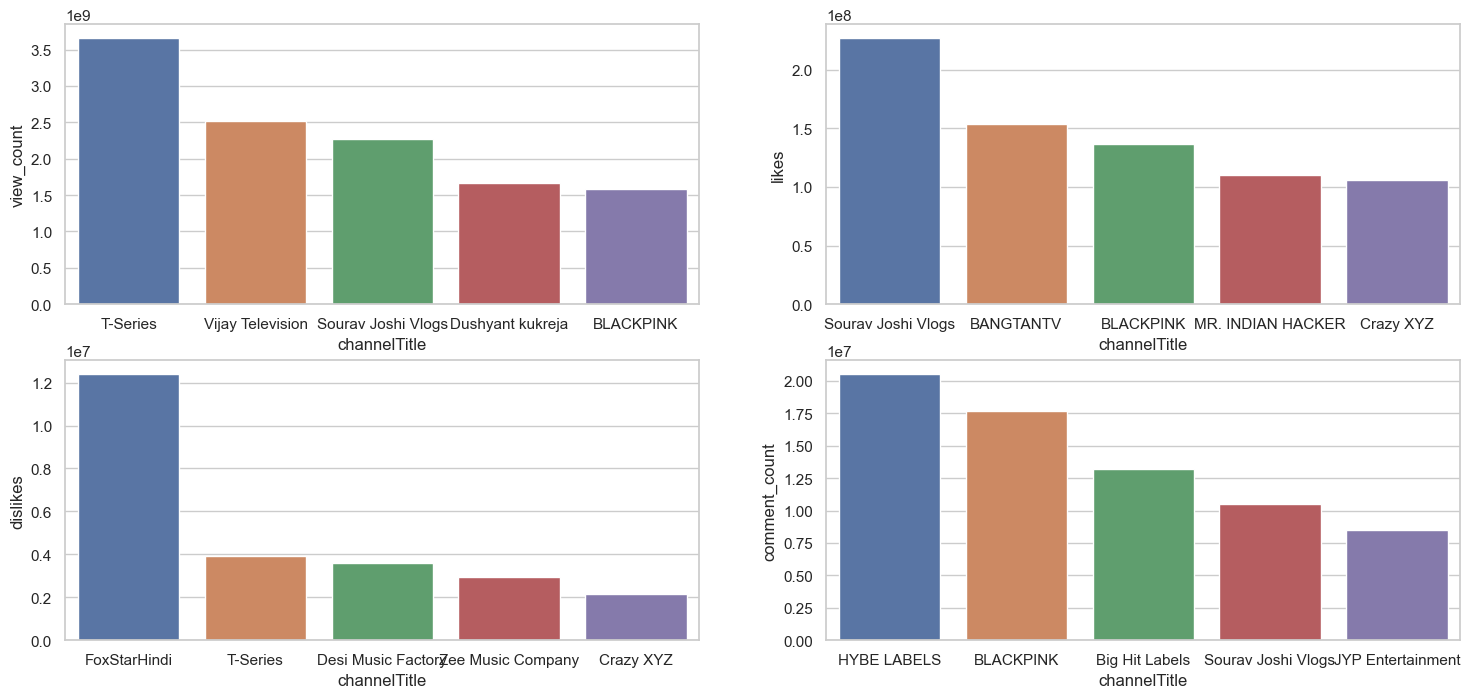

In [93]:
#Plotting the 5 channels with largest view count, likes, dislikes, comment_count
plt.figure(figsize = (18,8))
plt.subplot(2,2,1)

var_list = ['view_count','likes','dislikes','comment_count']

for i in range(0,4):
    plt.subplot(2,2,i+1)
    x = channel_group_df[var_list[i]].nlargest(5).index
    y = channel_group_df[var_list[i]].nlargest(5)
    sns.barplot(x = x,y = y)

T-series seems to be most viewed channel in India. Sourav Joshi vlogs are present in each of the top contenders of views,likes and comments.

FoxStarHindi leads the dislikes section reason being most disliked sadak 2 Movie trailer was from this channel. T-series with only being on in views not likes and comments finds itself in Disliked section.

Most of the disliked videos are coming from Entertainment type of Channels like movie production or music company channels.

BTS(Bangtan Sonyeondan - Korean Bulletproof Boy Scouts - Korean Pop Music Band) Channels are also leading in comments and likes with Korean girls channel Blackpink. 

#Most Watched Category

In [94]:
category_group_df = df.groupby(by = df['Video_Category']).sum()
category_group_df

,categoryId,view_count,likes,dislikes,comment_count,comments_disabled,ratings_disabled
Video_Category,,,,,,,
Anime/Animation,23936,3482502838,104359978,2254845,5221882,3,2
Autos & Vehicles,897,2917790934,94689221,3255250,4240977,5,5
Classics,6118,563982994,41327903,327773,1317236,2,1
Comedy,104940,35250173074,1855464728,37911989,180927951,18,62
Drama,167486,20668324845,1315410304,11837539,31107139,91,192
Family,77579,9904109894,669315492,7535813,18496941,24,31
Foreign,453240,48069360287,2039481608,49099525,62906849,157,105
Horror,39475,1541970716,29470756,3153409,3034702,70,144
Music,550,421685808,20910828,427127,419151,1,2


In [95]:
category_group_df[category_group_df['view_count'] == category_group_df['view_count'].max()]

,categoryId,view_count,likes,dislikes,comment_count,comments_disabled,ratings_disabled
Video_Category,,,,,,,
Foreign,453240,48069360287,2039481608,49099525,62906849,157,105


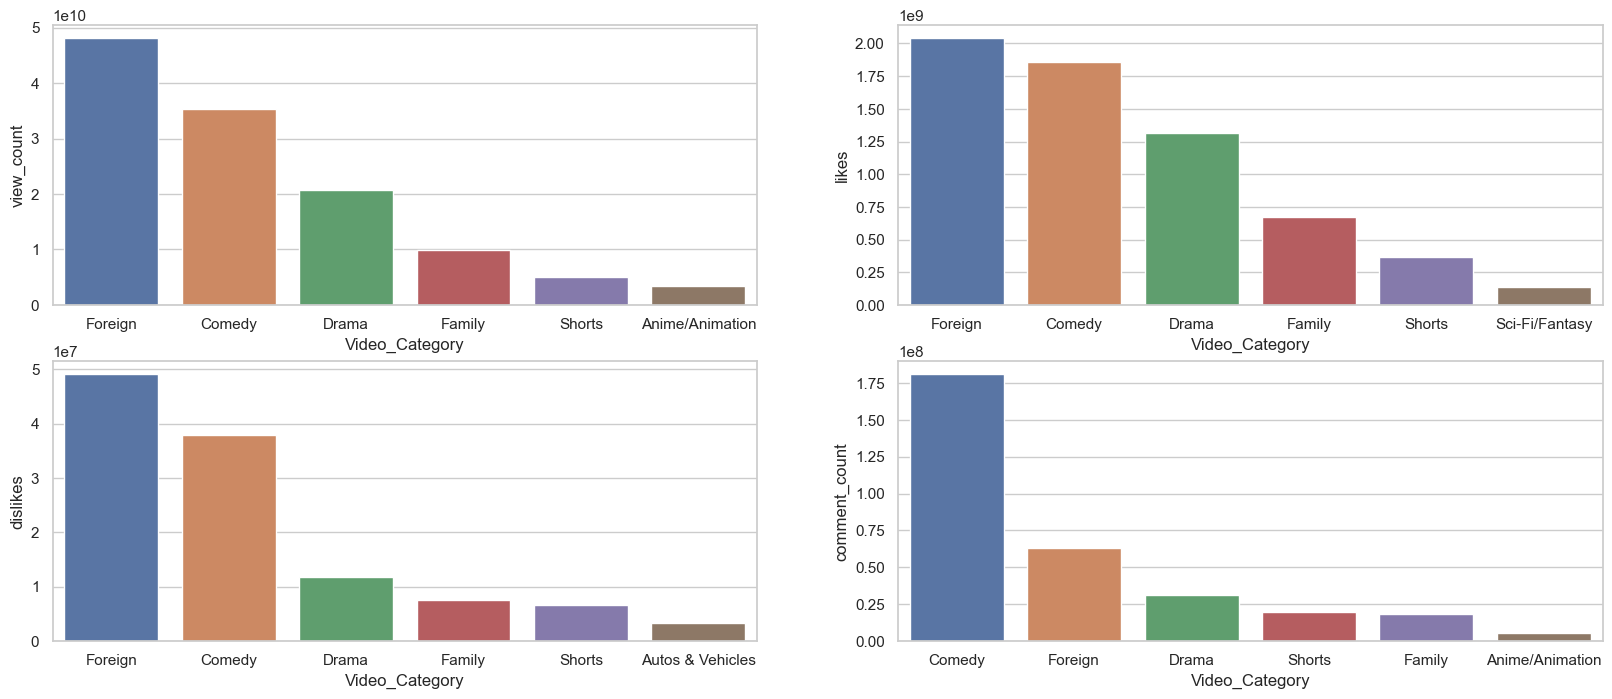

In [96]:
#Plotting the 5 categories with largest view count, likes, dislikes, comment_count}
plt.figure(figsize = (20,8))
plt.subplot(2,2,1)

var_list = ['view_count','likes','dislikes','comment_count']

for i in range(0,4):
    plt.subplot(2,2,i+1)
    x = category_group_df[var_list[i]].nlargest(6).index
    y = category_group_df[var_list[i]].nlargest(6)
    sns.barplot(x = x,y = y)

#Least Watched Category

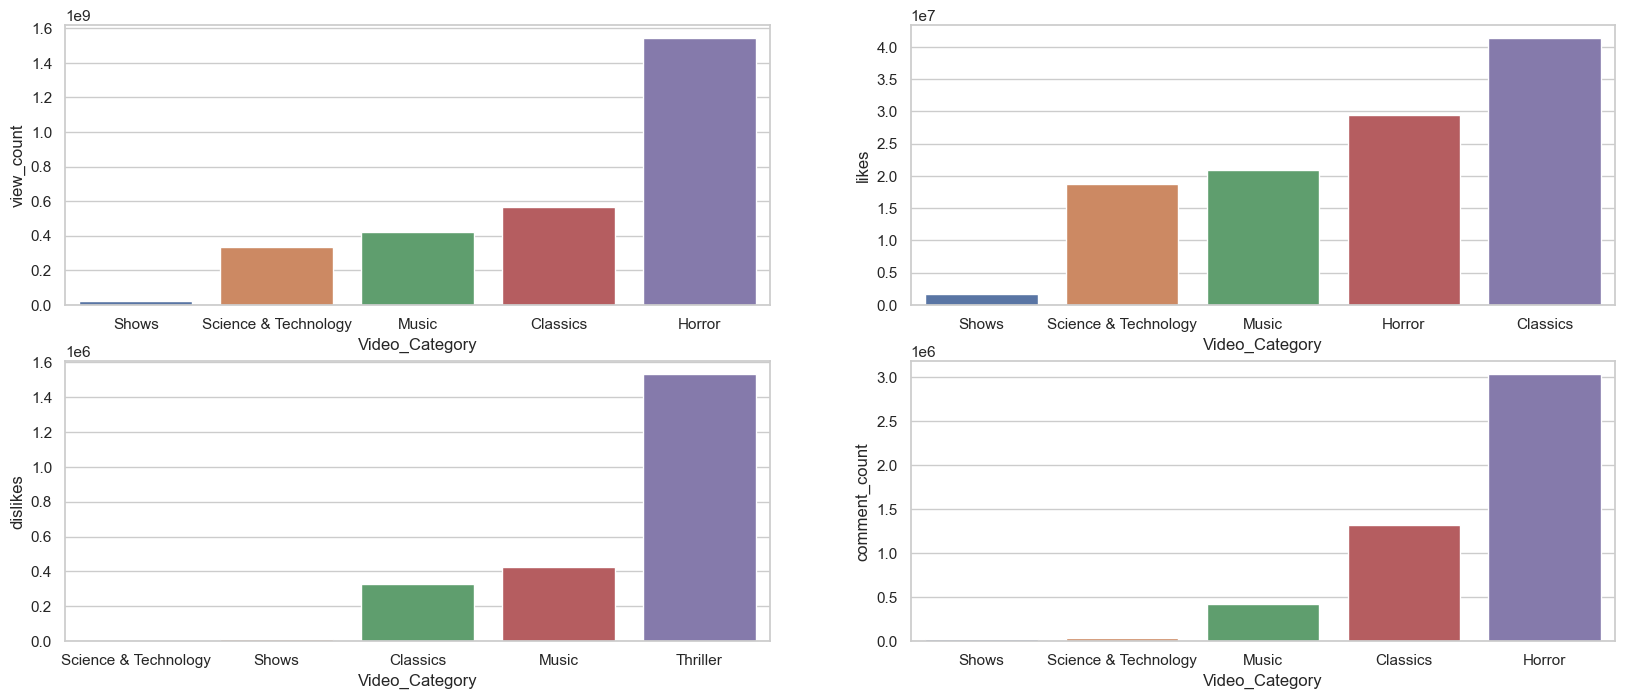

In [97]:
#Plotting the 5 Categories with smallest view count, likes, dislikes, comment_count 
plt.figure(figsize = (20,8))
plt.subplot(2,2,1)

var_list = ['view_count','likes','dislikes','comment_count']

for i in range(0,4):
    plt.subplot(2,2,i+1) 
    x = category_group_df[var_list[i]].nsmallest(5).index
    y = category_group_df[var_list[i]].nsmallest(5)
    sns.barplot(x = x,y = y)

**Shows** are the least watched category and least like as well

##Follow up Analysis

But is that right way of analysis?

1. Dislikes would be more as there are more views. Shouldn't we consider the percentage ?
2. Does highest views say that the public are highly interested in watching those Category videos?

Let's dive deep further to understand even more



Usually, In most cases, viewers just watch the video and turn to other video without Liking/Disliking/Commenting. But if they responded to a video in like/comment/dislike then that does signifies something and we need to capture that.

Let's create a Response percentage column which signifies the public response to a video and engagement b/w viewers and the video

In [98]:
df_Views_Analysis["Response_Percentage"] = round((( df_Views_Analysis.Likes + df_Views_Analysis.Dislikes ) /df_Views_Analysis.view_count)* 100,2)



df_Views_Analysis

,Video_Category,view_count,Likes,Dislikes,Response_Percentage
0,Anime/Animation,3409452140,101326230,2255995,3.04
1,Autos & Vehicles,2882587134,93430979,3239950,3.35
2,Classics,557540087,40832359,321287,7.38
3,Comedy,34521044813,1822401152,36199371,5.38
4,Drama,20963188680,1330160004,11947340,6.40
5,Family,9694596165,642567874,7348410,6.70
6,Foreign,48004512563,2031051486,48974942,4.33
7,Horror,1533432090,29184442,3136659,2.11
8,Music,406558072,20035514,407200,5.03
9,Sci-Fi/Fantasy,2521392914,143084727,1975857,5.75


#Public Response vs Type of Videos

Text(0, 0.5, 'Public Response(in percentage)')

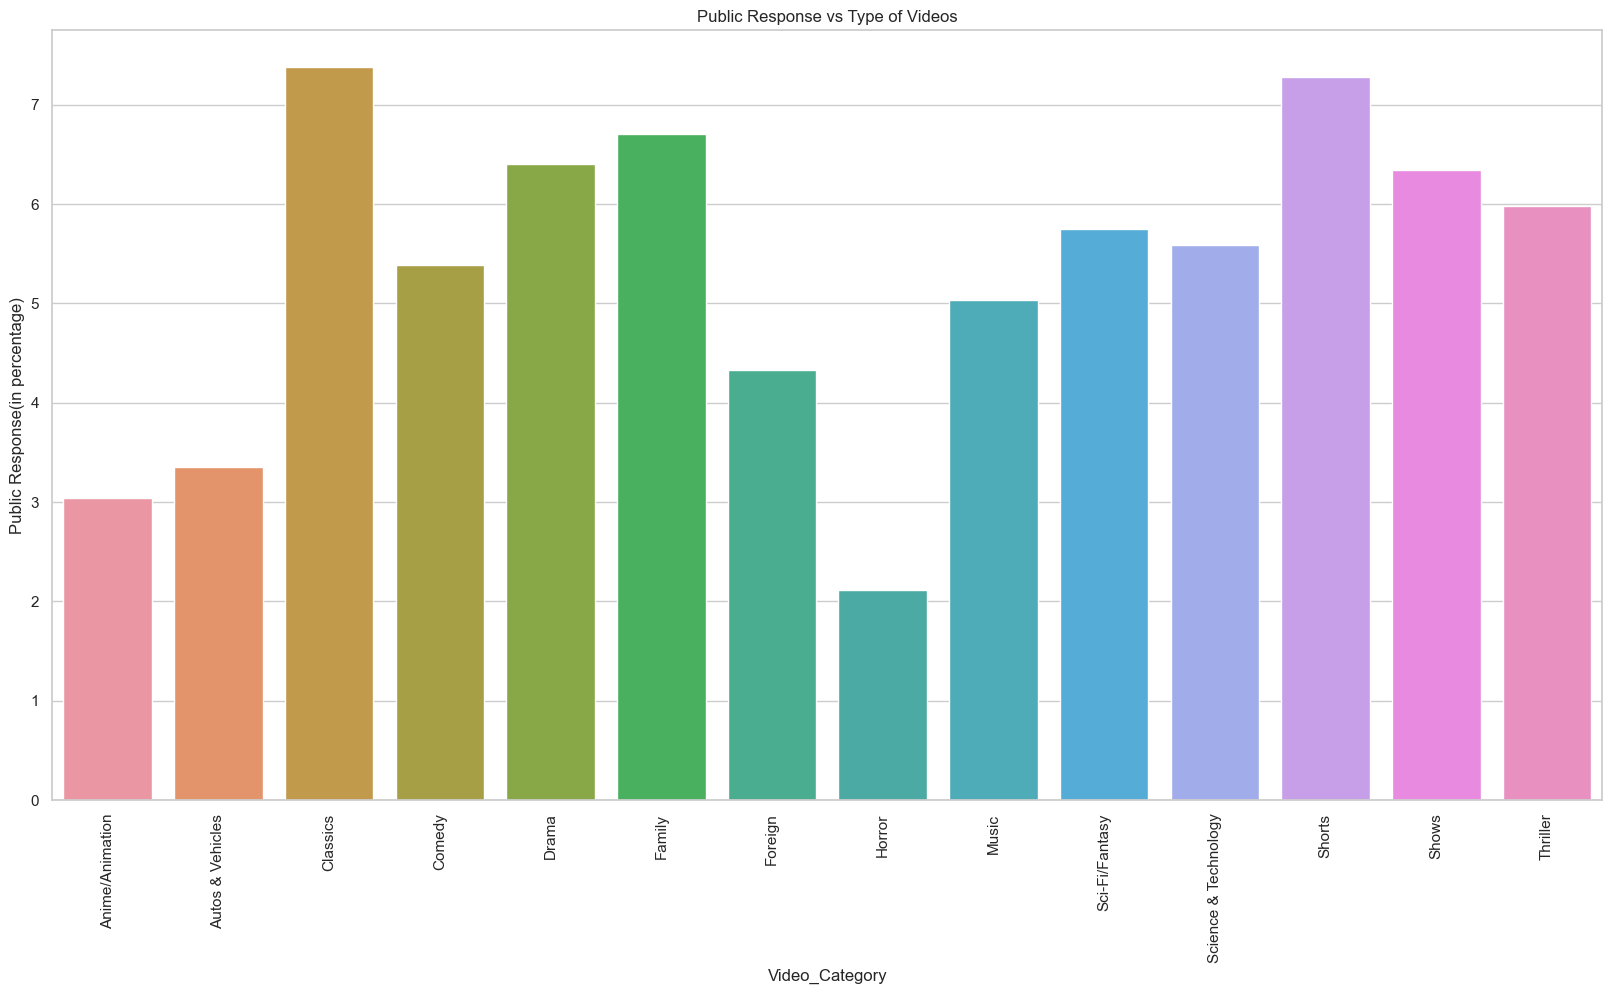

In [99]:
# Set the width and height of the figure
plt.figure(figsize=(20,10))

# Add title
plt.title("Public Response vs Type of Videos")
plt.xticks(rotation=90)

sns.barplot(x=df_Views_Analysis.Video_Category, y=df_Views_Analysis.Response_Percentage)

# Add label for vertical axis
plt.ylabel("Public Response(in percentage)")

So now, We can see that Viewers are highly reacting to Classics, Drama, Family, Sports, Sci-fi/Fantacy Videos. 

Let's randomly see what those videos are:

In [100]:
df_maxViews[df_maxViews.Video_Category.isin(["Sports", "Classics"])].sample(20)


,video_id,title,publishedAt,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,comments_disabled,ratings_disabled,description,Video_Category
15085,sT8rrxf-TaE,ഒരു കടയിലെ കിളികളെ മുഴുവൻ മേടിക്കാം | Buying 7...,2020-10-28T11:30:05Z,Fishing Freaks,19,2020-10-30T00:00:00Z,kerala|fishing|traditional|kerala fishing|snak...,807064,69556,1189,9550,False,False,🔥Don't miss your chance to increase your budge...,Classics
13149,8CL8KIh_yjc,"കുത്തി കരയിപ്പിച്ചു, Last Video From Serbia",2020-10-18T04:30:01Z,Mallu Traveler,19,2020-10-19T00:00:00Z,mallu traveler|travel vlogs|mallu traveller|ke...,564302,45627,1364,4686,False,False,--------------Get Tab give Away watch this vid...,Classics
117994,DqdWTLixqow,A Day in my life ✈️ in UK 👩‍👧 🇬🇧 | First Video...,2022-04-15T12:30:10Z,Fishing Freaks,19,2022-04-19T00:00:00Z,kerala|fishing|traditional|kerala fishing|snak...,1118471,65250,0,1783,False,False,#happyhazelnutchocolatespread Visit our websit...,Classics
95558,3yegtpmOjM4,My Dream SUPERBIKE delivery in Lucknow 😍,2021-12-26T04:28:47Z,Jatt Prabhjot,19,2021-12-26T00:00:00Z,[None],425293,58848,0,1841,False,False,"Gud Morning Friends, Sat Shri Akal, Namaste, B...",Classics
143964,vnq9SvrqEq4,#miniglovevlog Day 40 “Aadya Yeah Raha” #littl...,2022-08-27T02:00:12Z,LittleGlove,19,2022-08-28T00:00:00Z,[None],3027158,240716,0,381,False,False,NaN,Classics
60080,f5rmNKy1nLY,കുട്ടി റൈഡറെ കാണേണ്ടവർ വന്നോളീൻ 😍| our little ...,2021-06-22T12:30:47Z,Dream rider280,19,2021-06-25T00:00:00Z,[None],288529,21060,305,1097,False,False,ഇനി വാവയെ നമ്മുടെ ഫാമിലിയെ കാണിച്ചില്ലെന്ന് വേ...,Classics
107006,lRl450s-CD4,பூமிக்கு அடியில் கிணற்றுக்குள் ஒரு அதிசய கோவில...,2022-02-17T03:16:54Z,Gingee Traveller,19,2022-02-22T00:00:00Z,[None],2389578,124475,0,297,False,False,NaN,Classics
59899,A7_6TooUoAY,കുട്ടി റൈഡർ വിശേഷങ്ങൾ..|kuttirider name | hosp...,2021-06-21T12:36:22Z,Dream rider280,19,2021-06-24T00:00:00Z,#CoinswitchKuber#CoinswitchKuberApp,295443,22217,368,1635,False,False,Coinswitch YouTube channel link: https://youtu...,Classics
144825,9PYI6n6Lm14,#miniglovevlog Day 44 “Humare Ghar Gannu Aye” ...,2022-08-31T02:00:02Z,LittleGlove,19,2022-09-01T00:00:00Z,[None],3041480,256020,0,293,False,False,NaN,Classics
137640,iYAK5GdheIA,#MiniGloveVlog Day 07 is vlog ka title suggest...,2022-07-24T03:30:19Z,LittleGlove,19,2022-07-27T00:00:00Z,[None],5384897,357442,0,450,False,False,NaN,Classics


Let's create Similar Percentages and see what they infer

In [101]:
df_Views_Analysis["LikesPercentage"] = df_Views_Analysis.Likes*100/df_Views_Analysis.view_count
df_Views_Analysis["DislikesPercentage"] = df_Views_Analysis.Dislikes*100/df_Views_Analysis.view_count
df_Views_Analysis["Comments"] = df_Comments["comment_count"]
df_Views_Analysis["CommentsPercentage"] = df_Views_Analysis.Comments*100/df_Views_Analysis.view_count
df_Views_Analysis

,Video_Category,view_count,Likes,Dislikes,Response_Percentage,LikesPercentage,DislikesPercentage,Comments,CommentsPercentage
0,Anime/Animation,3409452140,101326230,2255995,3.04,2.971921,0.066169,4980619,0.146083
1,Autos & Vehicles,2882587134,93430979,3239950,3.35,3.241220,0.112397,4177745,0.144930
2,Classics,557540087,40832359,321287,7.38,7.323663,0.057626,1194838,0.214305
3,Comedy,34521044813,1822401152,36199371,5.38,5.279102,0.104862,176845011,0.512282
4,Drama,20963188680,1330160004,11947340,6.40,6.345218,0.056992,30713548,0.146512
5,Family,9694596165,642567874,7348410,6.70,6.628104,0.075799,17219247,0.177617
6,Foreign,48004512563,2031051486,48974942,4.33,4.230960,0.102022,62034194,0.129226
7,Horror,1533432090,29184442,3136659,2.11,1.903211,0.204552,3012019,0.196423
8,Music,406558072,20035514,407200,5.03,4.928082,0.100158,415788,0.102270
9,Sci-Fi/Fantasy,2521392914,143084727,1975857,5.75,5.674829,0.078364,3398208,0.134775


<Axes: xlabel='Video_Category'>

<Figure size 2000x1000 with 0 Axes>

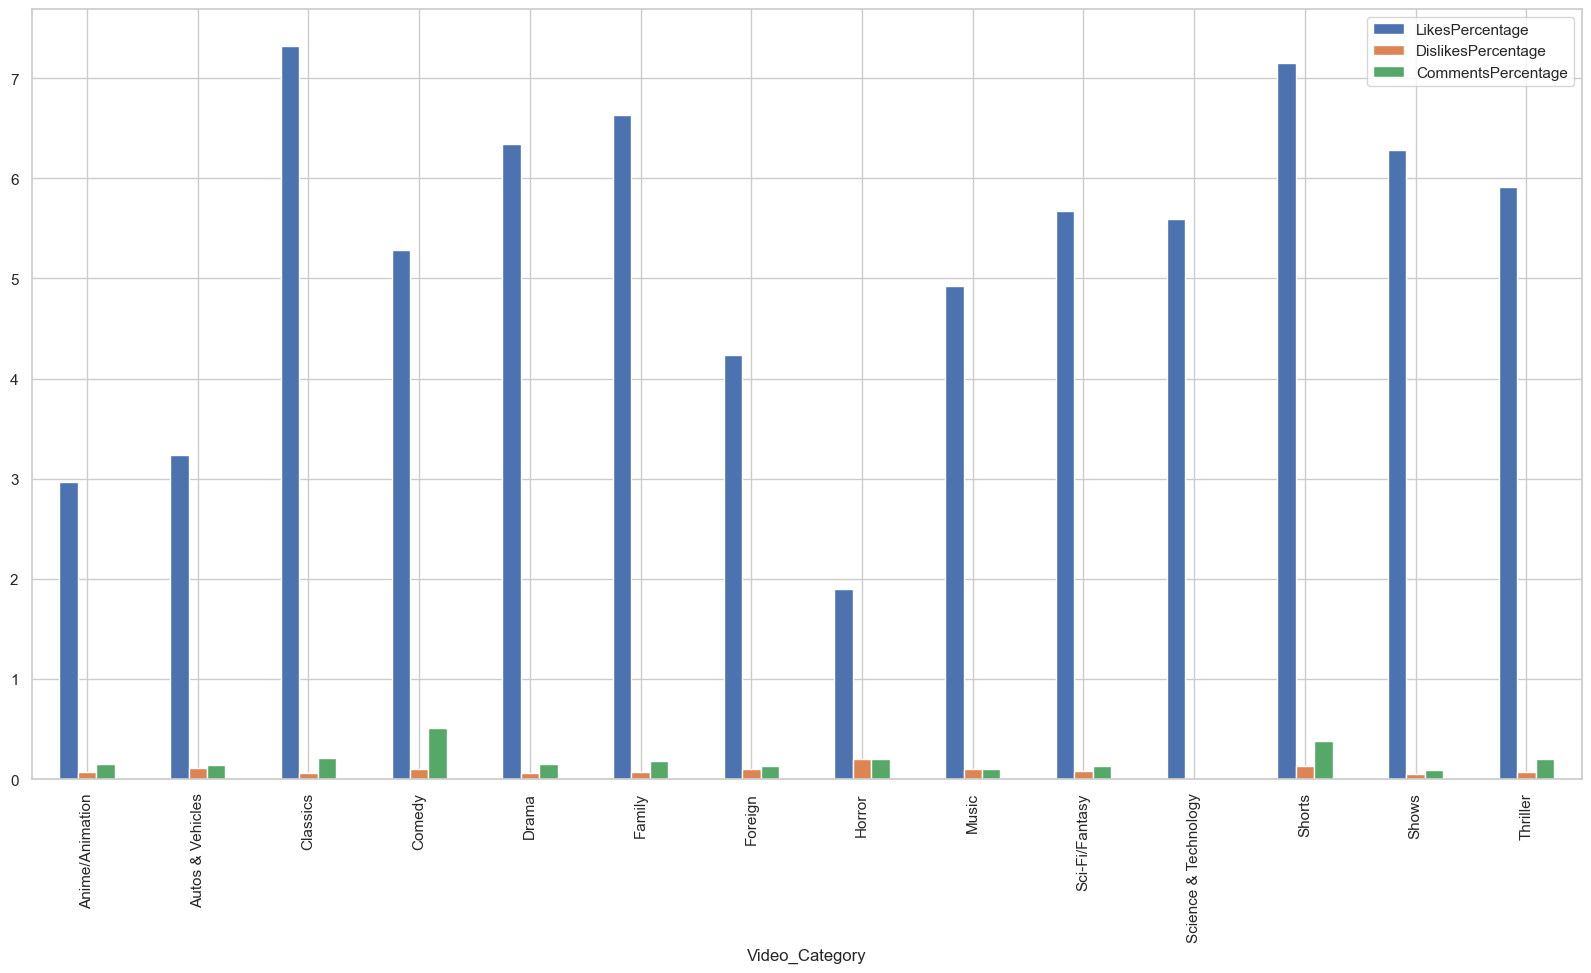

In [102]:
# Set the width and height of the figure
plt.figure(figsize=(20,10))

df_Views_Analysis.plot(x="Video_Category", y=["LikesPercentage", "DislikesPercentage", "CommentsPercentage"], kind="bar",figsize=(20,10))

#CommentsPercentage vs Type of Videos

Text(0, 0.5, 'Comments')

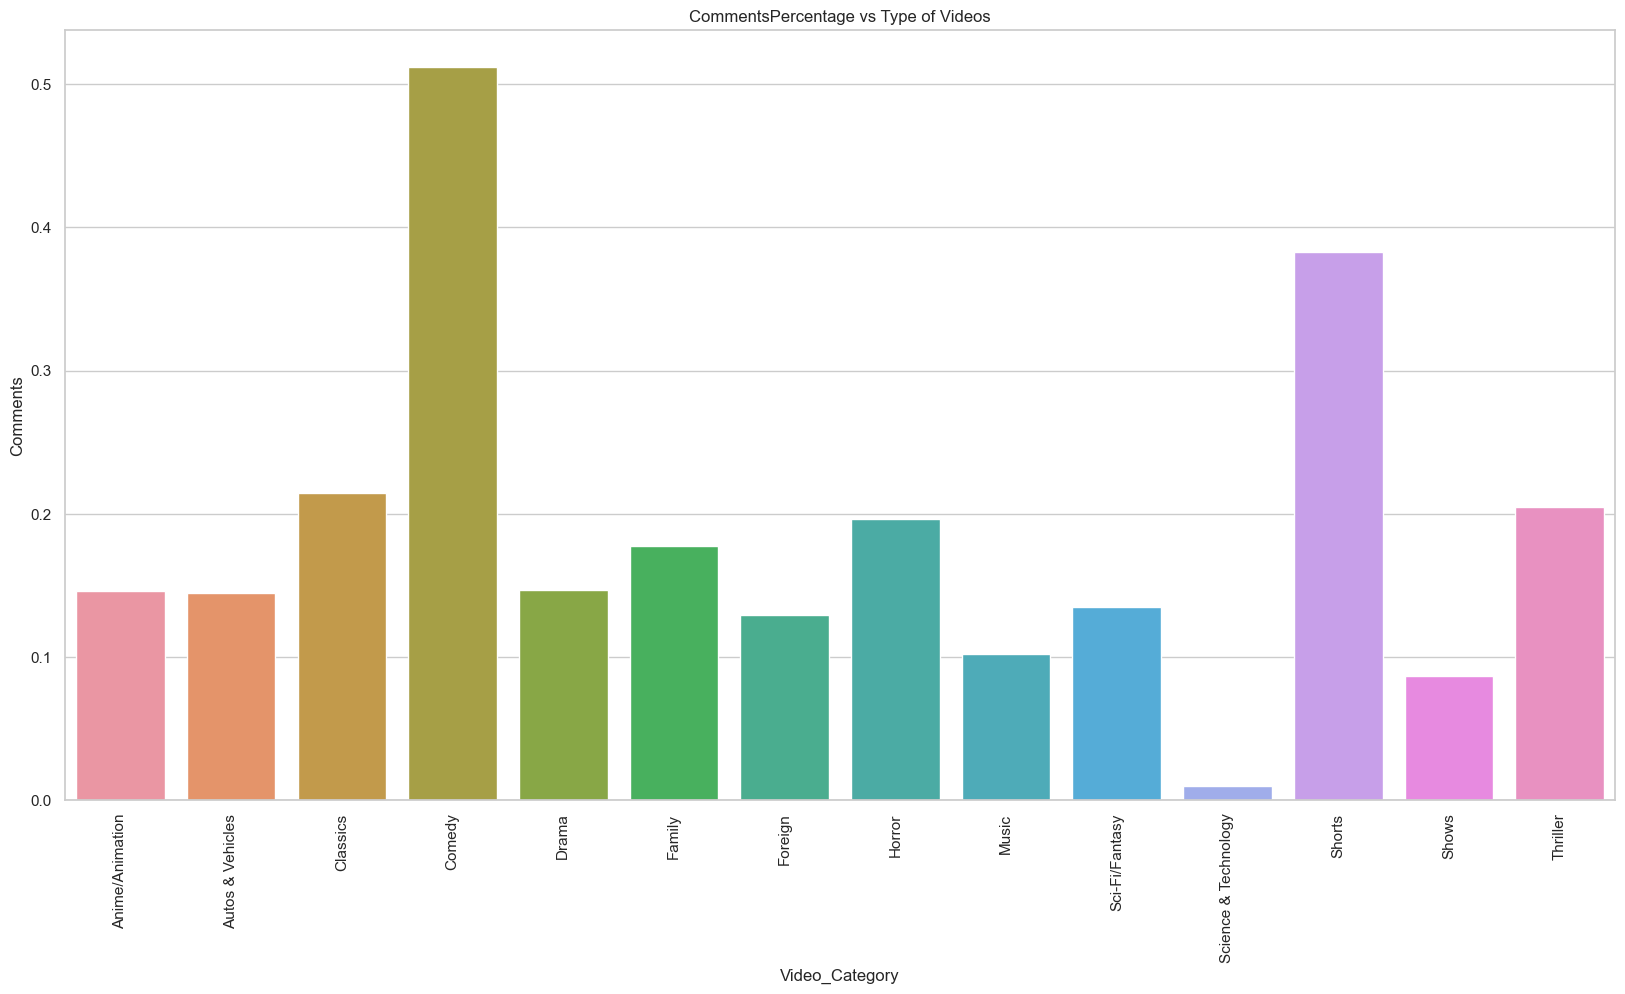

In [103]:
# Set the width and height of the figure
plt.figure(figsize=(20,10))

# Add title
plt.title("CommentsPercentage vs Type of Videos")
plt.xticks(rotation=90)

sns.barplot(x=df_Views_Analysis.Video_Category, y=df_Views_Analysis.CommentsPercentage)

# Add label for vertical axis
plt.ylabel("Comments")

Comedy and Shorts has the most comments.

Text(0, 0.5, 'Dislikes')

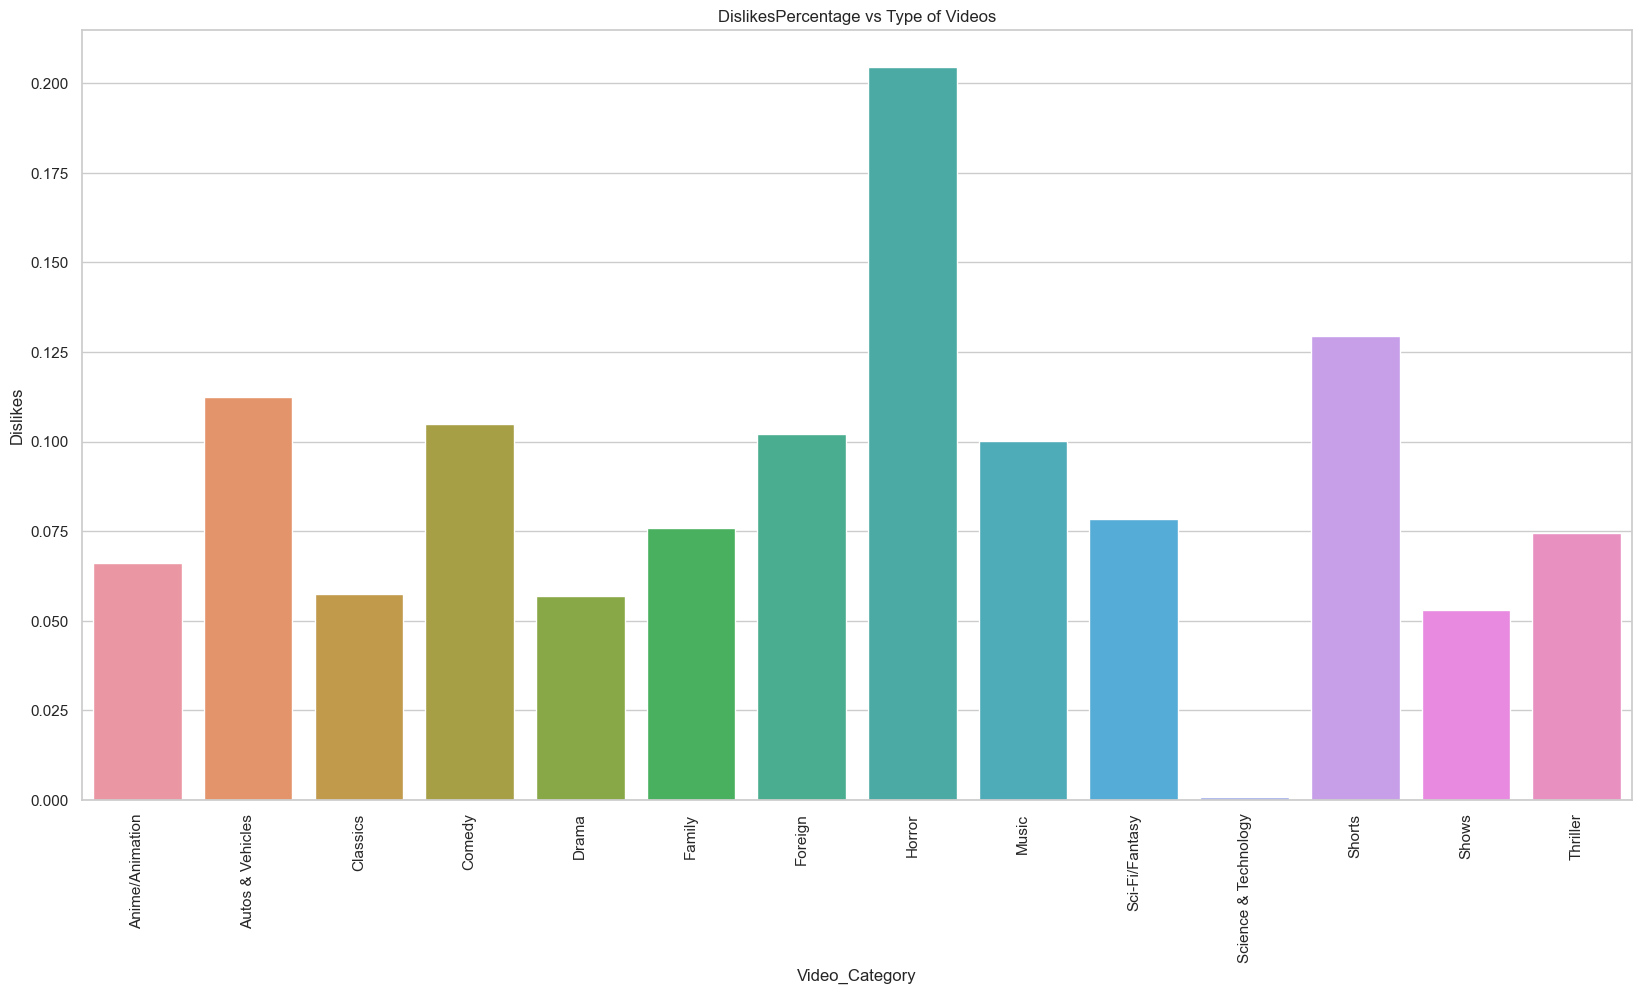

In [104]:
# Set the width and height of the figure
plt.figure(figsize=(20,10))
plt.xticks(rotation=90)

# Add title
plt.title("DislikesPercentage vs Type of Videos")

sns.barplot(x=df_Views_Analysis.Video_Category, y=df_Views_Analysis.DislikesPercentage)

# Add label for vertical axis
plt.ylabel("Dislikes")

**Horror** movies seems to receive the most dislikes

#LikesPercentage vs Type of Videos

Text(0, 0.5, 'Likes')

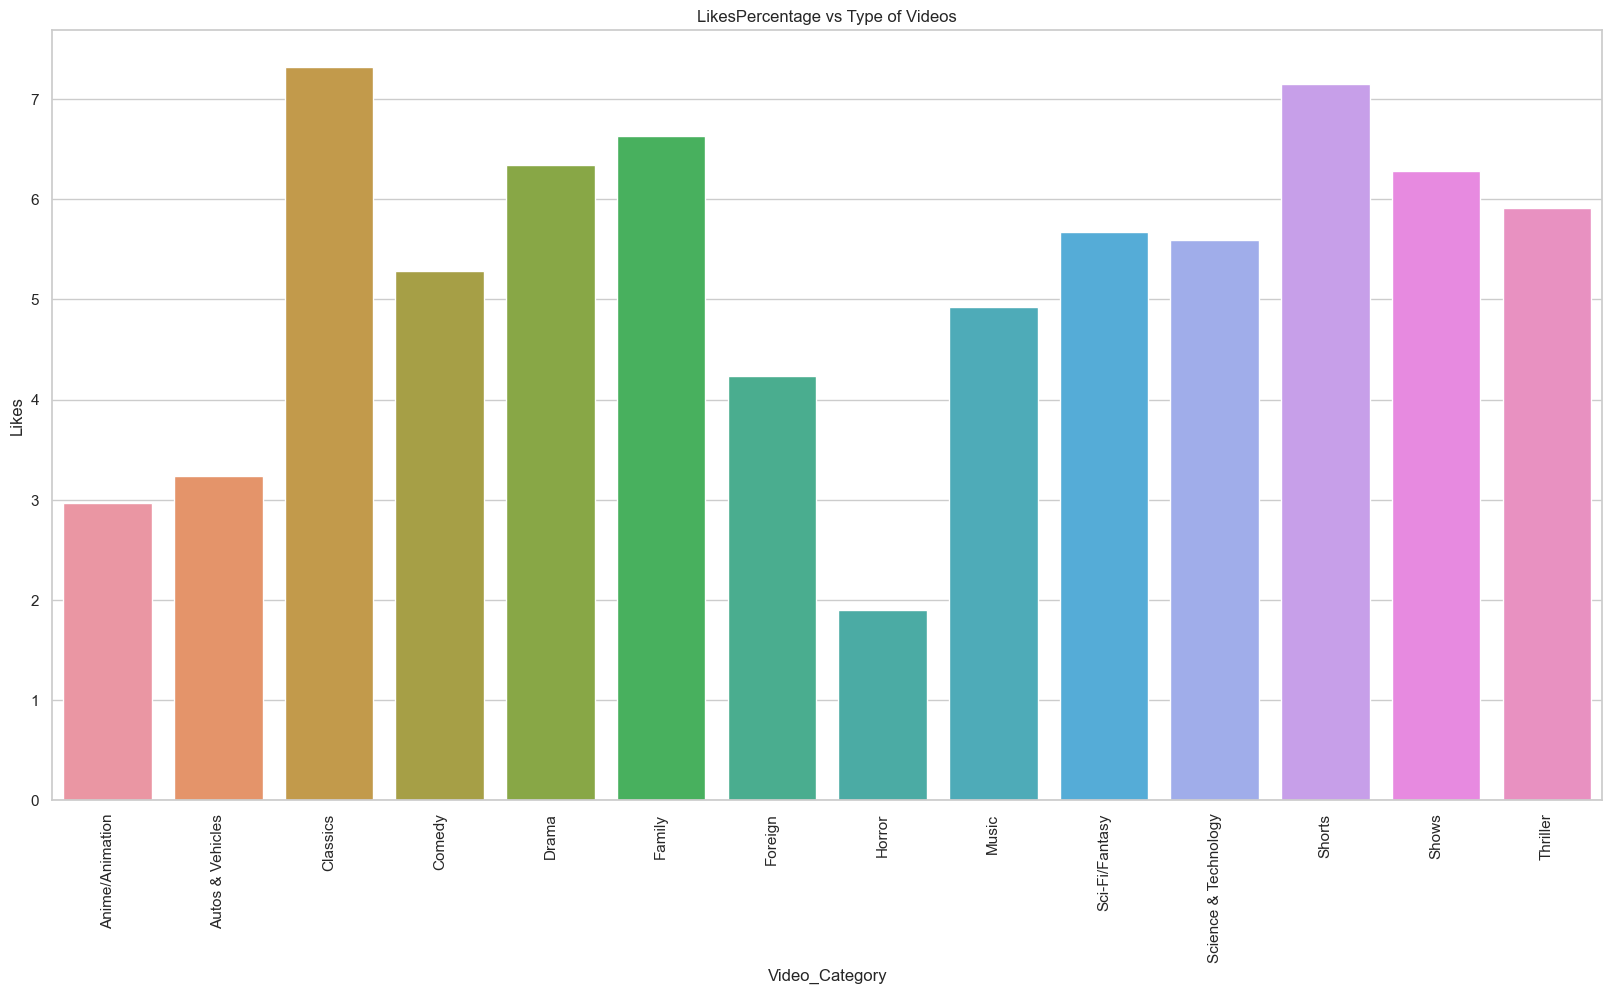

In [105]:
# Set the width and height of the figure
plt.figure(figsize=(20,10))
plt.xticks(rotation=90)

# Add title
plt.title("LikesPercentage vs Type of Videos")

sns.barplot(x=df_Views_Analysis.Video_Category, y=df_Views_Analysis.LikesPercentage)

# Add label for vertical axis
plt.ylabel("Likes")

**Classics, Shorts** and **Family** movies seems to receive the most likes

<br>

#Channel Analysis

In [106]:
df_Channel = df_maxViews.groupby('channelTitle')["view_count"].sum().reset_index()
df_Like = df_maxViews.groupby('channelTitle')["likes"].sum().reset_index()
df_Dislike = df_maxViews.groupby('channelTitle')["dislikes"].sum().reset_index()
df_Comments = df_maxViews.groupby('channelTitle')["comment_count"].sum().reset_index()
df_Channel["Likes"] = df_Like.likes
df_Channel["Dislikes"] = df_Dislike.dislikes
df_Channel["Comments"] = df_Comments.comment_count

df_Channel.sample(10)

,channelTitle,view_count,Likes,Dislikes,Comments
3083,Studio Saraswati Official,4700539,125002,7208,6596
3147,Sushma Chhikara,3374391,63139,9790,3591
2190,News18 Kannada,2547988,67754,463,1459
2390,Pooja Reddy,45994,727,50,13
2924,Shruti Shorts,380943,14234,0,11
277,Anil Kumar Masani,60449463,5598711,0,5081
517,Bicstol Cini Comedy,672122,5686,451,69
2854,Shab's Creation,1730453,9125,2104,281
1185,Gk Subhash Charan,5442950,369118,2868,26591
2027,Mr Riddles,812600,35005,0,310


In [107]:
df_Channel.sort_values('view_count', ascending=False).iloc[:25,:]

,channelTitle,view_count,Likes,Dislikes,Comments
3174,T-Series,3605729251,96610966,3847392,6630604
3624,Vijay Television,2546942360,54654378,909236,3134836
3027,Sourav Joshi Vlogs,2248052445,223933074,1032729,10369759
915,Dushyant kukreja,1667219165,97914610,1859647,336732
442,BLACKPINK,1583164945,136256960,1912398,17694285
2042,MrBeast,1256389734,83415829,566834,4691285
726,Crazy XYZ,1213024080,105160576,2131297,6286459
174,Ajay Sharma,1092146916,55418519,1379520,92375
3009,Sony Music India,1020569225,22149631,1065808,2987260
1260,HYBE LABELS,1016062898,102838507,531216,20575336


#Channel vs total views

Text(0, 0.5, 'Total Views')

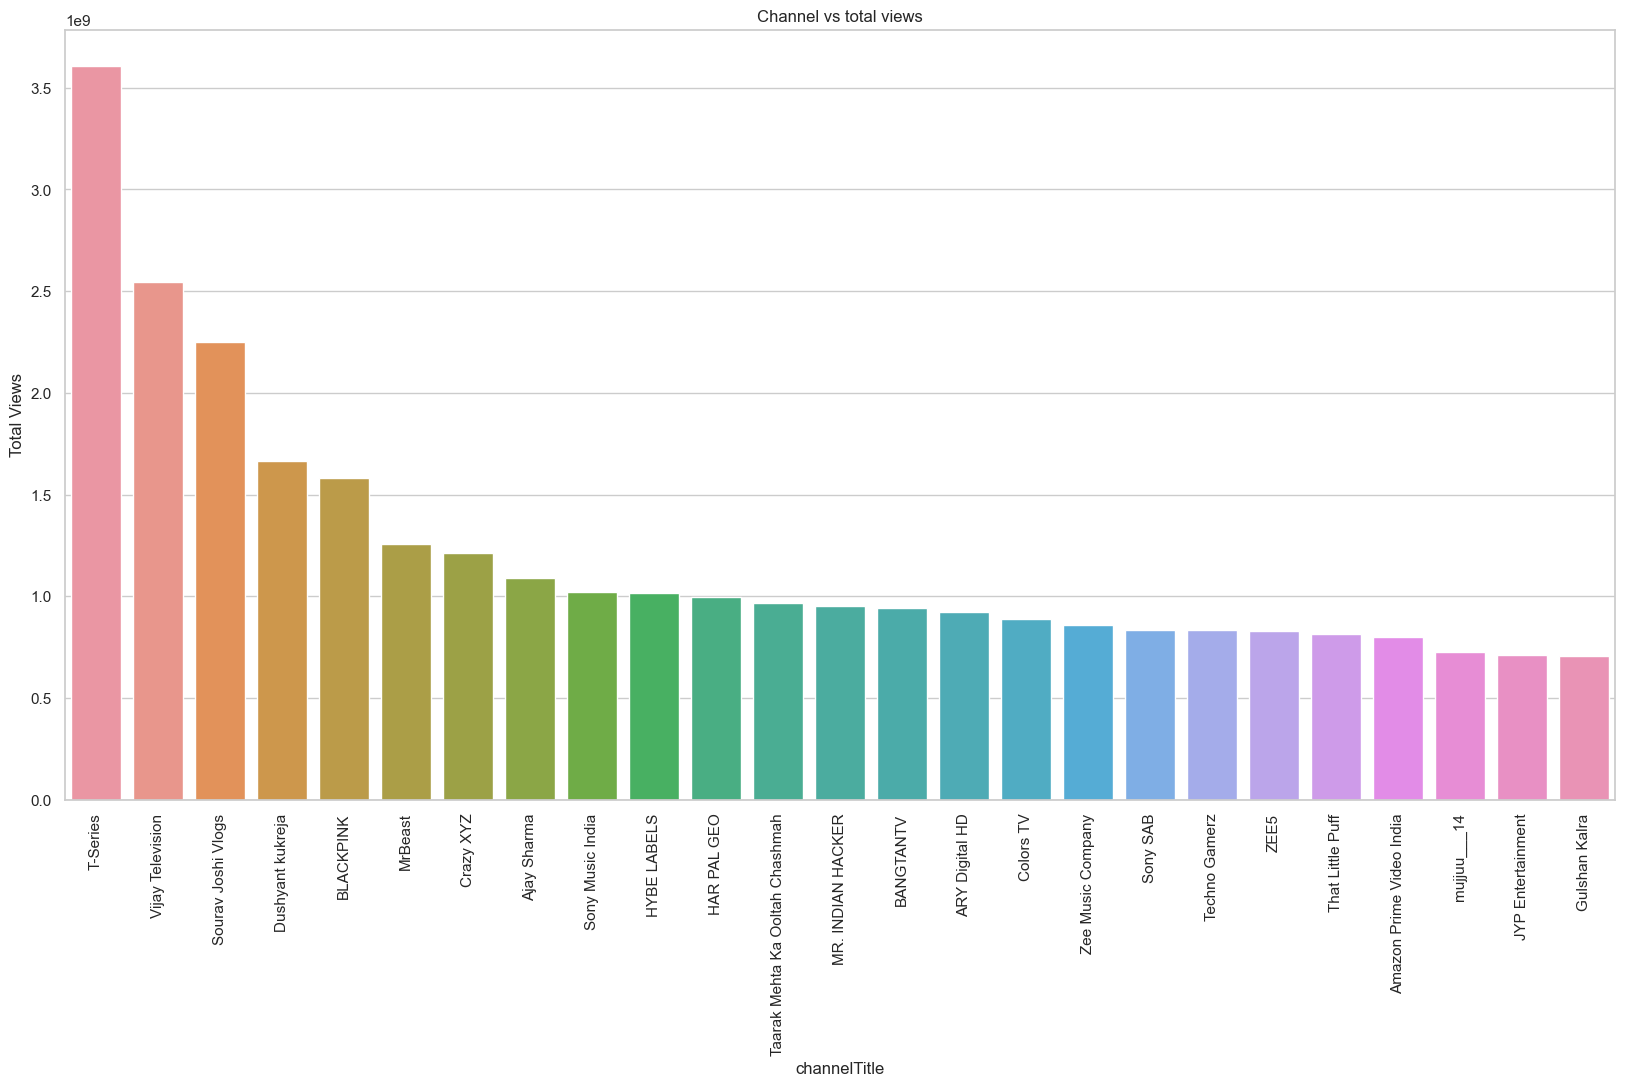

In [108]:
Channel_Views = df_Channel.sort_values('view_count', ascending=False).iloc[:25,:]
# Set the width and height of the figure
plt.figure(figsize=(20,10))

# Add title
plt.title("Channel vs total views")
plt.xlabel
plt.xticks(rotation=90)

sns.barplot(x=Channel_Views.channelTitle, y=Channel_Views.view_count)

# Add label for vertical axis
plt.ylabel("Total Views")

#Channel vs total Likes

Text(0, 0.5, 'Total Likes')

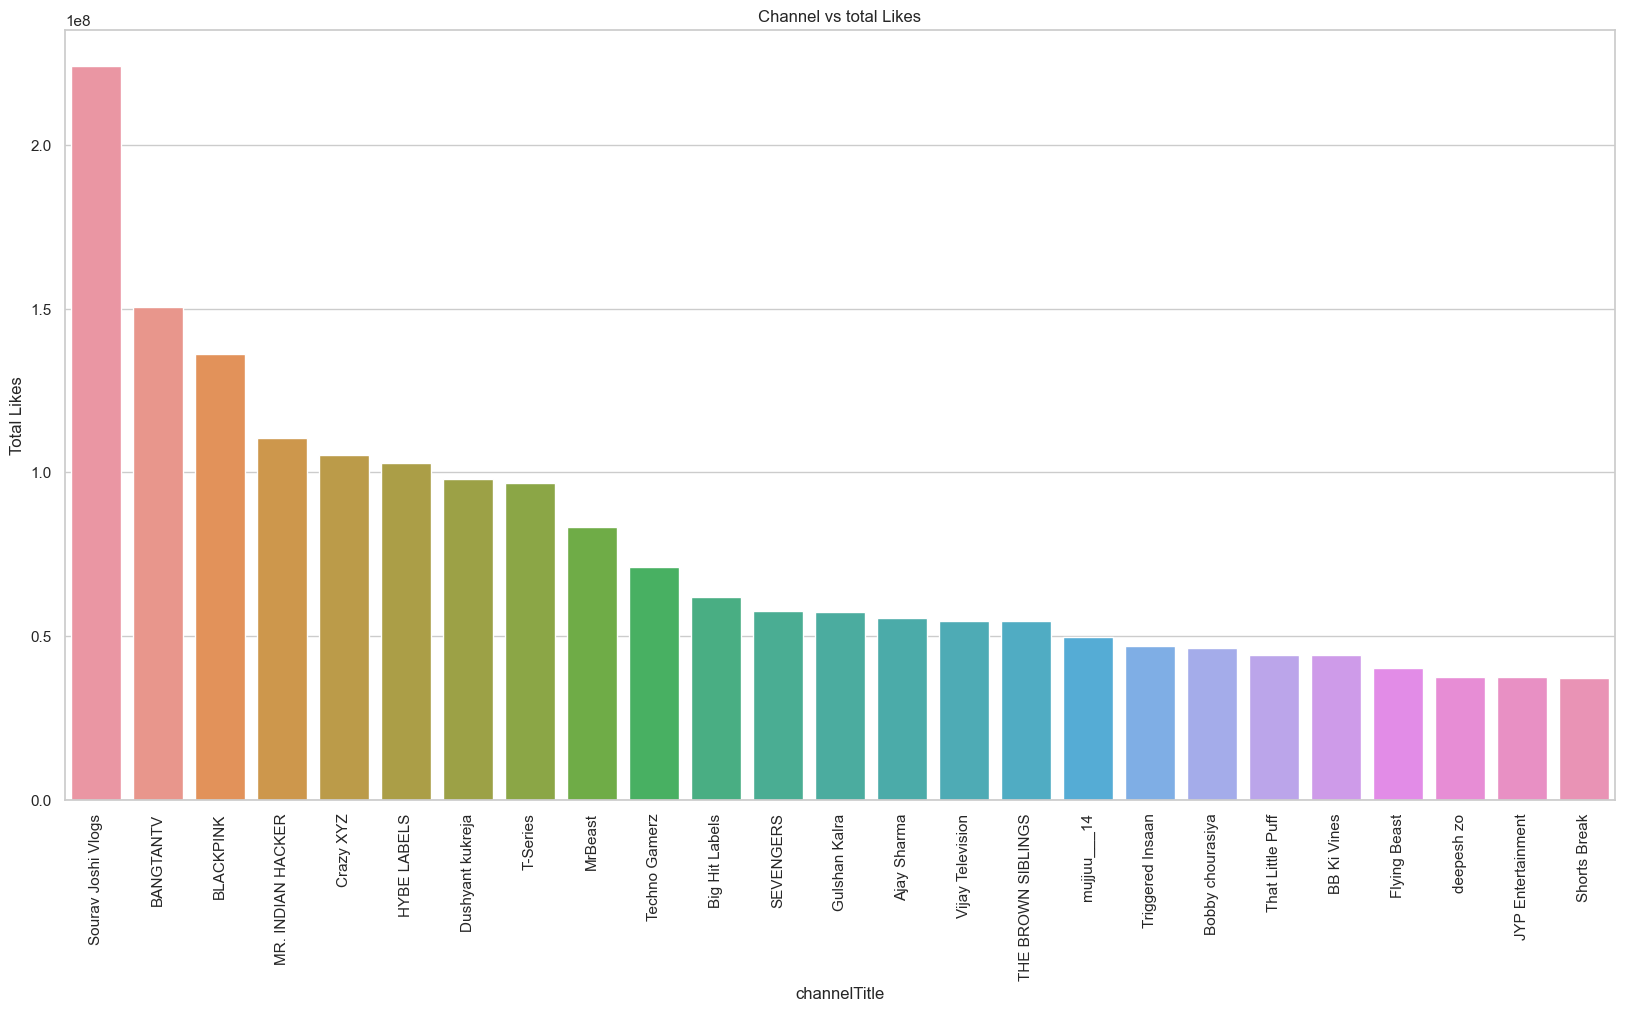

In [109]:
Channel_Views = df_Channel.sort_values('Likes', ascending=False).iloc[:25,:]
# Set the width and height of the figure
plt.figure(figsize=(20,10))

# Add title
plt.title("Channel vs total Likes")
plt.xlabel
plt.xticks(rotation=90)

sns.barplot(x=Channel_Views.channelTitle, y=Channel_Views.Likes)

# Add label for vertical axis
plt.ylabel("Total Likes")


#Channel vs total Comments

Text(0, 0.5, 'Total Comments')

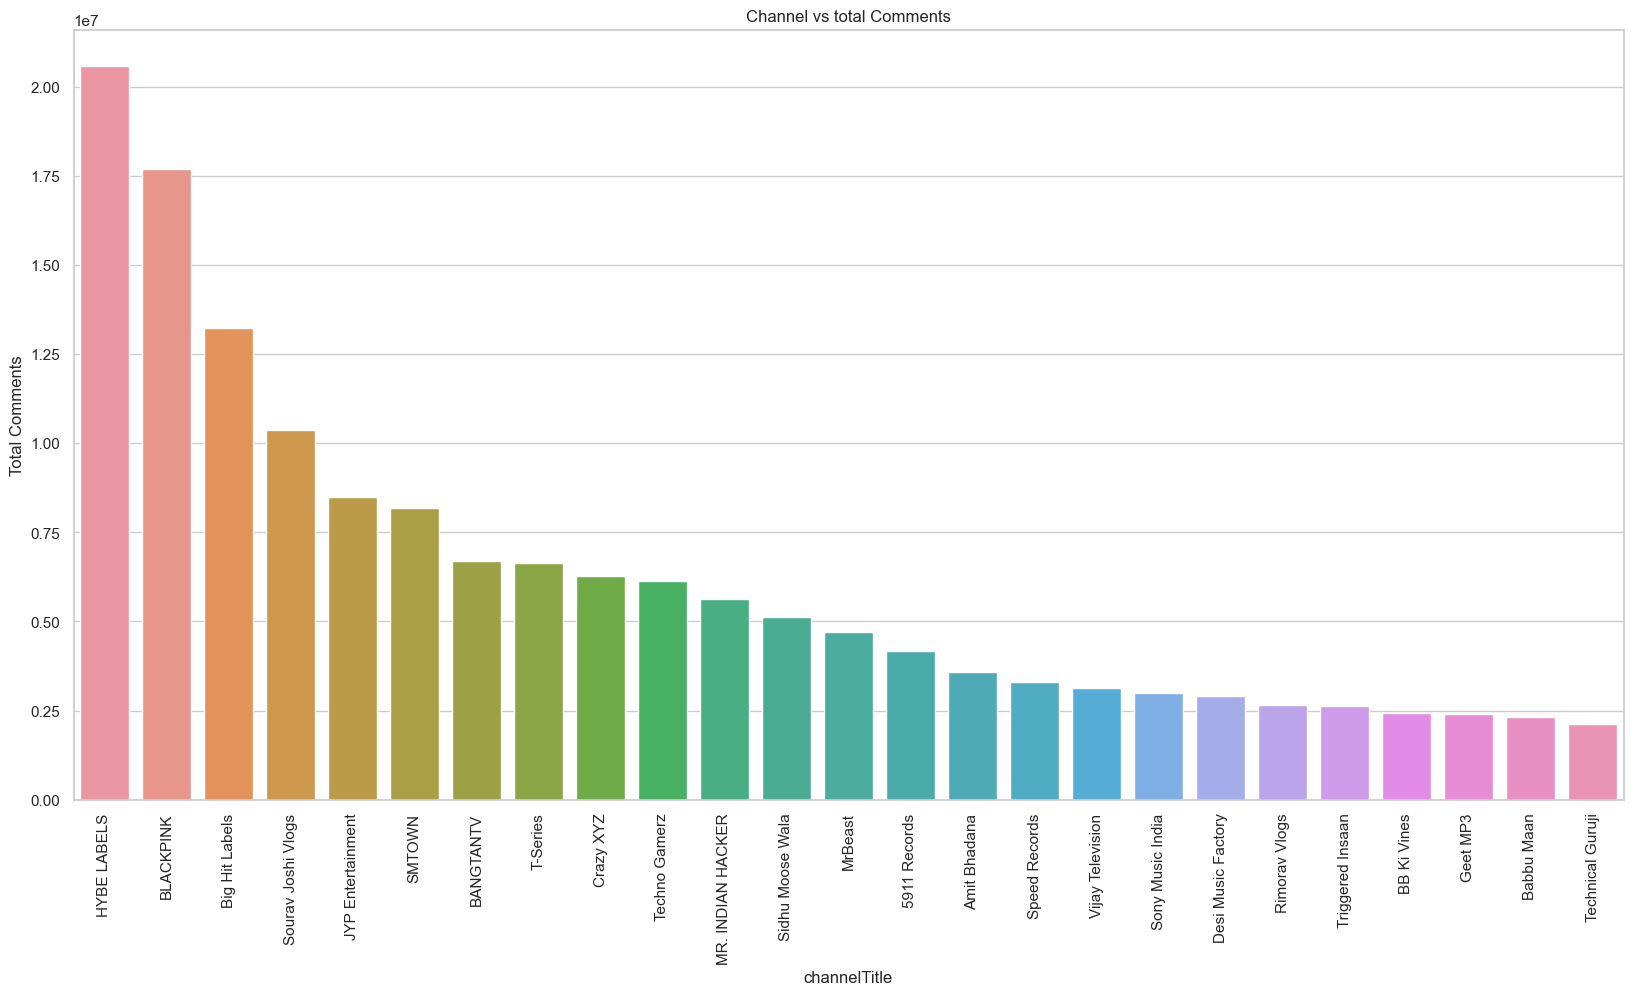

In [110]:
Channel_Views = df_Channel.sort_values('Comments', ascending=False).iloc[:25,:]
# Set the width and height of the figure
plt.figure(figsize=(20,10))

# Add title
plt.title("Channel vs total Comments")
plt.xlabel
plt.xticks(rotation=90)

sns.barplot(x=Channel_Views.channelTitle, y=Channel_Views.Comments)

# Add label for vertical axis
plt.ylabel("Total Comments")

<br>

##Let's try some different analysis now

In [111]:
NoOfDaysInTrending = dict(df.groupby('video_id')['view_count'].count())
NoOfDaysInTrending

{'--9rRxqTdjQ': 1,
 '--GS_EPuuMc': 1,
 '--L_wDHUaxY': 1,
 '--WGlFF6-yw': 1,
 '--vmXGvtqxQ': 1,
 '--xmP5nOoLM': 1,
 '-00zRvr9zyA': 1,
 '-05Hay2JrKg': 1,
 '-0Da_UPrV10': 1,
 '-0PR_BkK60E': 1,
 '-0Qa7hB2vXI': 1,
 '-0SOJVfKX00': 1,
 '-0beFQnB5lY': 1,
 '-0gtaC4AzHA': 1,
 '-0ldvhBlL-k': 2,
 '-0oRa0QXx6I': 1,
 '-0udX1wZ82U': 1,
 '-0wc4B969z0': 1,
 '-13QFm5vAoY': 1,
 '-19EvIcr9ZA': 1,
 '-1EIBWRRj4U': 1,
 '-1ImKHHc7Ck': 2,
 '-1QZHe8x2G0': 1,
 '-1dLG2z61hQ': 1,
 '-1ddUMd4BRw': 1,
 '-1i1gagGtu4': 1,
 '-1kFl7EWFqs': 1,
 '-1lRI4dseeA': 1,
 '-1pQX88fnUQ': 1,
 '-28tVGVeM_Q': 1,
 '-29uvnpHjpI': 1,
 '-2CYiqoM3BA': 1,
 '-2DOCcpdTS0': 1,
 '-2RBOk_RzA0': 1,
 '-2RJTVPSOPc': 1,
 '-2WasASWxgo': 1,
 '-2_qmj_X04o': 1,
 '-2a-DFvWa0k': 1,
 '-2dqKYHewY0': 1,
 '-2draG1JbKA': 1,
 '-3AQa1eM_PU': 1,
 '-3A_ptUS5_g': 1,
 '-3HiGsaH4Ew': 1,
 '-3IcQ3RygGE': 1,
 '-3KzmJPgHu4': 1,
 '-3LbftaK6jM': 1,
 '-3XxzOSIvZ8': 1,
 '-3_fPBahI_0': 1,
 '-3z4u6AHBxg': 1,
 '-3zqU_Z6T3o': 1,
 '-47LcGA8Fp4': 1,
 '-4L_ZLzYdlU': 1,
 '-4escF5itQ

In [112]:
def fetch_video_times(value):
    return NoOfDaysInTrending[value]

Let's try to find the Channels that have their videos in trending for most of the times.

In [114]:
df_maxViews["times_in_trending"] = df_maxViews.video_id.apply(fetch_video_times)
df_maxViews.sample(5)

KeyError: 'Qah9sSIXJqk'

Top 25 Videos that are in trending for many days

In [ ]:
df_trend_video_tt = df_maxViews.sort_values('times_in_trending', ascending=False).iloc[:25,:]
df_trend_video_tt

<br>

Top Channels whose video is in trending for most of the times

#Channel's Video vs no.of times in Trending

In [ ]:
#Top 20 videos with most no.of times in trending(Channel wise)

# Set the width and height of the figure
plt.figure(figsize=(20,10))

# Add title
plt.title("Channels vs no.of times in Trending")
plt.xlabel
plt.xticks(rotation=90)

sns.barplot(x=df_trend_video_tt.channelTitle, y=df_trend_video_tt.times_in_trending)
#sns.violinplot(x = df_trend_video_tt.channelTitle, y = df_minViews.DaysTakenToBeOnTrending )

# Add label for vertical axis
plt.ylabel("no.of trending")

<br>


Top 30 Channels whose Videos are in Trending

In [ ]:
df_Channel_Trending = df_maxViews.groupby("channelTitle")["times_in_trending"].sum().reset_index()
df_Channel_Trending["Majority_Videos_Category_Type"] = df_maxViews.groupby('channelTitle')['Video_Category'].agg(pd.Series.mode).reset_index()["Video_Category"]
df_Channel_Trending = df_Channel_Trending.sort_values('times_in_trending', ascending=False).iloc[:30,:]
df_Channel_Trending 

# Channel vs total no.of times in trending

In [ ]:
# Set the width and height of the figure
plt.figure(figsize=(20,10))

# Add title
plt.title("Channel vs total no.of times in trending")
plt.xlabel
plt.xticks(rotation=90)

sns.barplot(x=df_Channel_Trending.channelTitle, y=df_Channel_Trending.times_in_trending)

# Add label for vertical axis
plt.ylabel("no.of times in trending")

Category of the Videos Uploaded of Top Channels which are in Trending

#Category vs total no.of times in trending

In [ ]:
# Set the width and height of the figure
plt.figure(figsize=(20,10))

# Add title
plt.title("Category vs total no.of times in trending")
plt.xlabel
plt.xticks(rotation=90)
Category_Trending = df_Channel_Trending.groupby("Majority_Videos_Category_Type")["times_in_trending"].sum().reset_index()
sns.barplot(x=Category_Trending.Majority_Videos_Category_Type, y=Category_Trending.times_in_trending)

# Add label for vertical axis
plt.ylabel("no.of times in trending")

<br>

Let's create a column which calculates no.days took for the video to be in Trending. 0 being less than 24hrs

In [ ]:
df_minViews.trending_date

In [ ]:
df_minViews["JoinedTrending"] = pd.to_datetime(df_minViews.trending_date.str.split(',\s*').str[0]) #\s means matches "any whitespace character"
df_minViews["UploadedTime"] = pd.to_datetime(df_minViews.publishedAt.str.split(',\s*').str[0])
df_minViews["DaysTakenToBeOnTrending"] = (df_minViews["JoinedTrending"] - df_minViews["UploadedTime"]).dt.days
df_minViews['DaysTakenToBeOnTrending'] = df_minViews['DaysTakenToBeOnTrending'].apply(lambda x: 0 if x == -1 else x)
df_minViews.sample(10)

#Average no.of days took to be in trending

In [ ]:
#Top 20 videos with most no.of times in trending(Channel wise)

# Set the width and height of the figure
plt.figure(figsize=(20,10))

# Add title
plt.title("Average no.of days took to be in trending")
plt.xlabel
plt.xticks(rotation=90)

sns.barplot(x=df_minViews.Video_Category, y=df_minViews['DaysTakenToBeOnTrending'])
#sns.violinplot(x = df_minViews.Video_Category, y = df_minViews.DaysTakenToBeOnTrending )

# Add label for vertical axis
plt.ylabel("Avg no.of days")

In [ ]:
df.head()

#FURTHER ANALYSIS :: Student Assignment

1) Which category of videos have comments disabled ? 

2) Which category of videos have ratings disabled ? 

3) Most watched video in India overall | Year wise | Category wise 

4) Yearwise number of Videos published which were trending 

5) Distributions of Numerical Columns 

6) View the correlations between the numerical variables 

7) Plot the lmplots and regplots with numerical and categorical variables combinations and their relationships 

**SUBMISSION:**

Instructions:
1. Upload your files to your google drive.
2. Send a link to your files to the instructor at the assignment submission page for the instructor to review.


NB: If you are using Google Colab, just use the share button to get a link to share with the instructor.